# 波形を生成し音色を聞き比べる

[C1S3_Timbre](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Timbre.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import libfmp.b
import libfmp.c1

In [2]:
def plot_spectrogram(x, Fs=11025, N=4096, H=2048, figsize=(4, 2)):
    """Computation and subsequent plotting of the spectrogram of a signal

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        x: Signal (waveform) to be analyzed
        Fs: Sampling rate (Default value = 11025)
        N: FFT length (Default value = 4096)
        H: Hopsize (Default value = 2048)
        figsize: Size of the figure (Default value = (4, 2))

    """
    # N, H = 2048, 1024
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=np.hanning)  # not 'hamming'
    Y = np.abs(X)
    plt.figure(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max),
                             y_axis='linear', x_axis='time', sr=Fs, hop_length=H) # cmap='gray_r'
    plt.ylim([0, 3000])
    # plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [3]:
import librosa

In [4]:
import IPython.display as ipd

In [5]:
Fs = 11025
dur = 5
freq = 261.626
amp = 0.5
figsize = (8, 2)

## 正弦波 (sinusoid) を生成する

* [Sine wave - Wikipedia](https://en.wikipedia.org/wiki/Sine_wave)

In [7]:
num_samples = int(Fs * dur)
t = np.arange(num_samples) / Fs
x = amp * np.sin(2*np.pi*(freq*t))

# x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=freq)

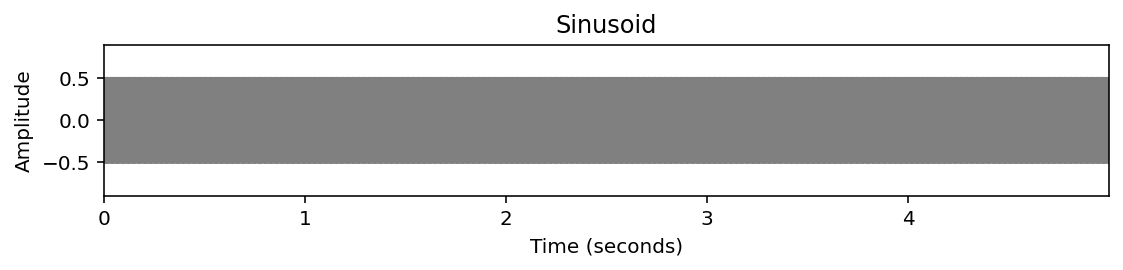

In [8]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.show()

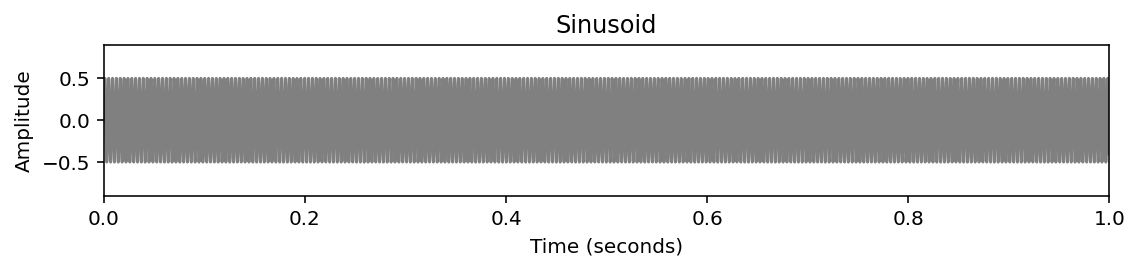

In [10]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, 1])
plt.show()

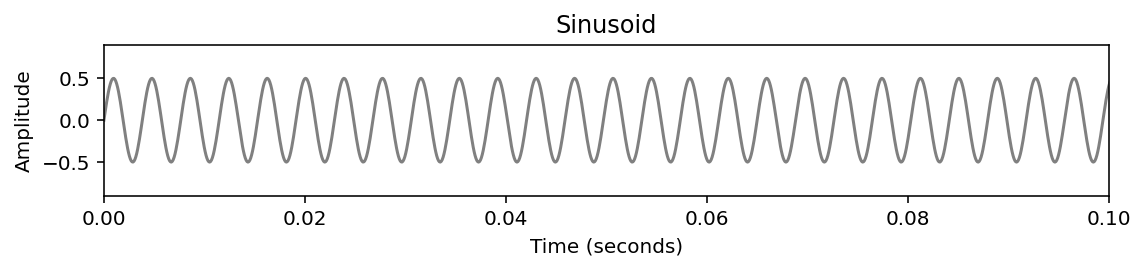

In [11]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .1])
plt.show()

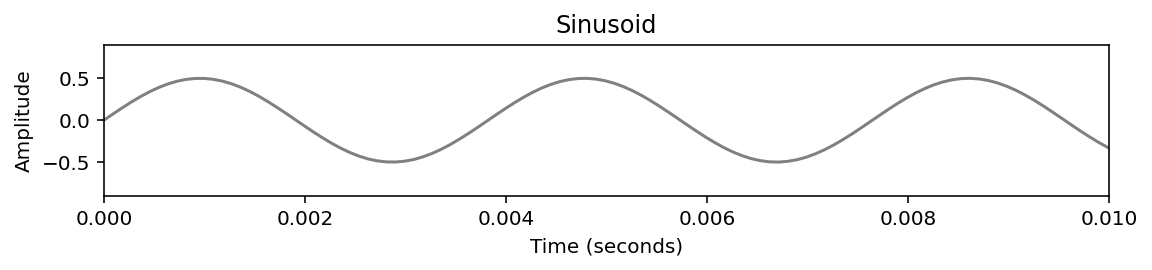

In [12]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .01])
plt.show()

In [13]:
ipd.display(ipd.Audio(data=x, rate=Fs))

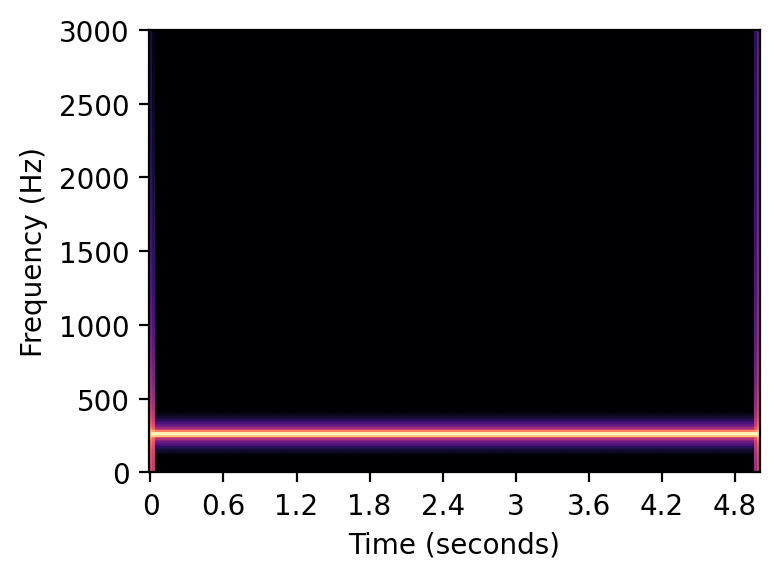

In [14]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

## トレモロを加える

* [Tremolo - Wikipedia](https://en.wikipedia.org/wiki/Tremolo)

In [15]:
def generate_sinusoid_tremolo(dur=5, Fs=1000, amp=0.5, freq=440, trem_amp=0.1, trem_rate=5):
    """Generation of a sinusoid signal with tremolo

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        trem_amp (float): Amplitude of the amplitude oscillation (Default value = 0.1)
        trem_rate (float): Rate (Hz) of the amplitude oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)
    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    amps = amp + trem_amp * np.sin(t * 2 * np.pi * trem_rate)
    x = amps * np.sin(2*np.pi*(freq*t))
    return x, t

In [16]:
x_trem, t = generate_sinusoid_tremolo(dur=dur, Fs=Fs, amp=amp, freq=freq, trem_amp=0.3, trem_rate=5)

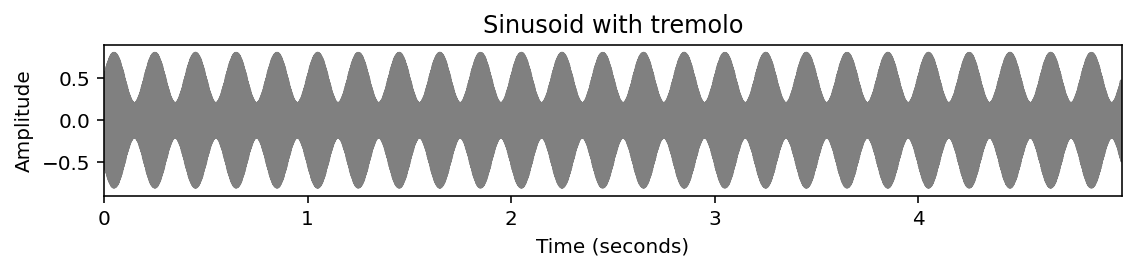

In [17]:
libfmp.b.plot_signal(x_trem, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.show()

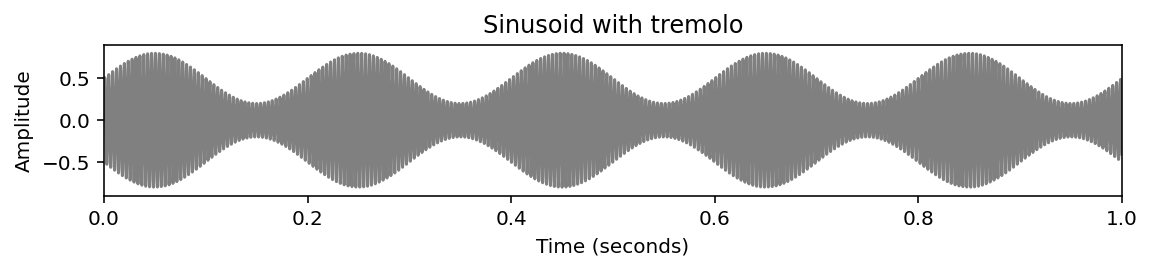

In [19]:
libfmp.b.plot_signal(x_trem, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.xlim([0, 1])
plt.show()

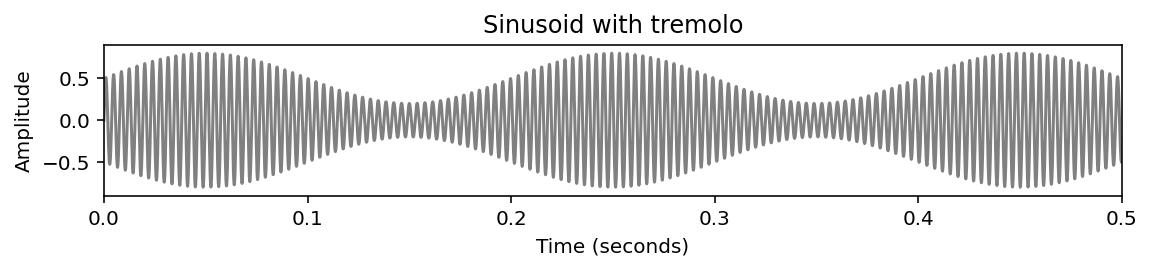

In [22]:
libfmp.b.plot_signal(x_trem, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .5])
plt.show()

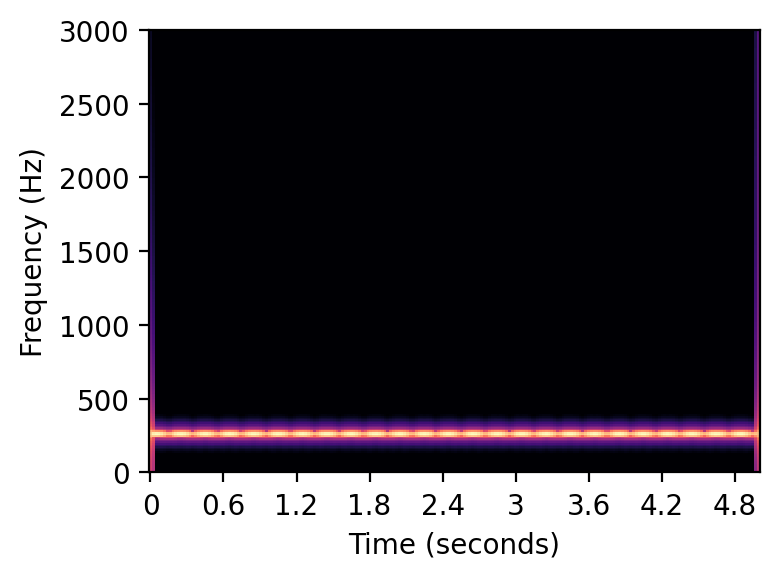

In [21]:
plot_spectrogram(x_trem, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [23]:
ipd.display(ipd.Audio(data=x_trem, rate=Fs))

## ビブラートを加える

* [Vibrato - Wikipedia](https://en.wikipedia.org/wiki/Vibrato)

In [24]:
def generate_sinusoid_vibrato(dur=5, Fs=1000, amp=0.5, freq=440, vib_amp=1, vib_rate=5):
    """Generation of a sinusoid signal with vibrato

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        vib_amp (float): Amplitude (Hz) of the frequency oscillation (Default value = 1)
        vib_rate (float): Rate (Hz) of the frequency oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)

    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    freq_vib = freq + vib_amp * np.sin(t * 2 * np.pi * vib_rate)
    phase_vib = np.zeros(num_samples)
    for i in range(1, num_samples):
        phase_vib[i] = phase_vib[i-1] + 2 * np.pi * freq_vib[i-1] / Fs
    x = amp * np.sin(phase_vib)
    return x, t

In [25]:
x_vib, t = generate_sinusoid_vibrato(dur=dur, Fs=Fs, amp=amp, freq=freq, vib_amp=10, vib_rate=5)

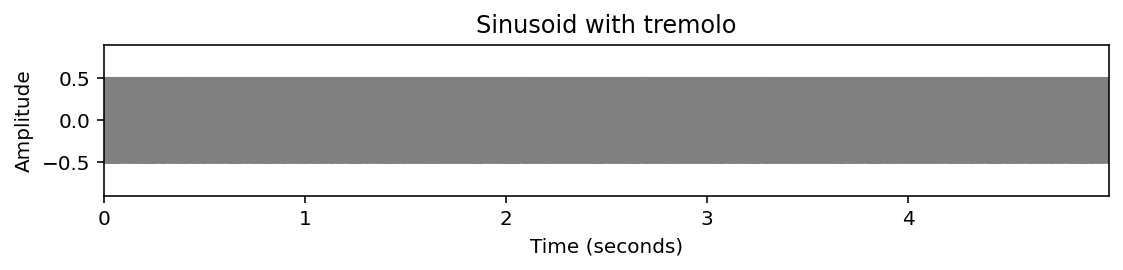

In [26]:
libfmp.b.plot_signal(x_vib, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.show()

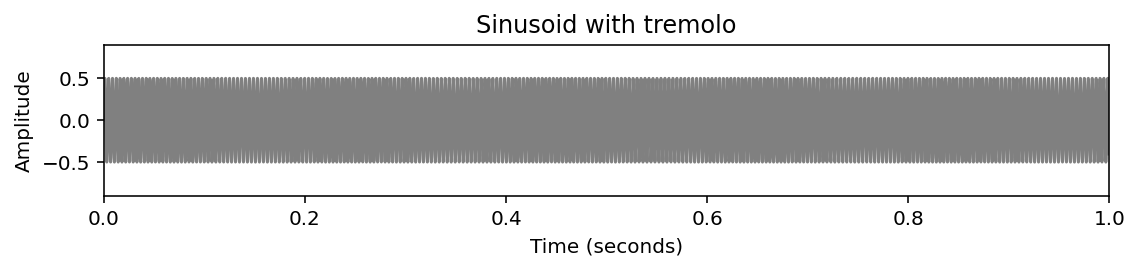

In [28]:
libfmp.b.plot_signal(x_vib, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.xlim([0, 1])
plt.show()

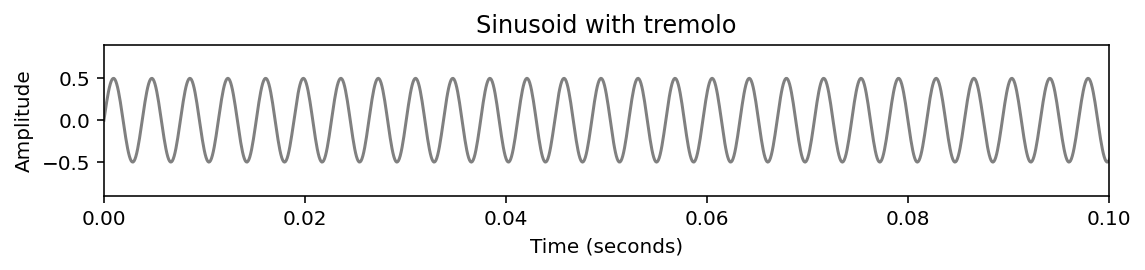

In [29]:
libfmp.b.plot_signal(x_vib, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with tremolo')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .1])
plt.show()

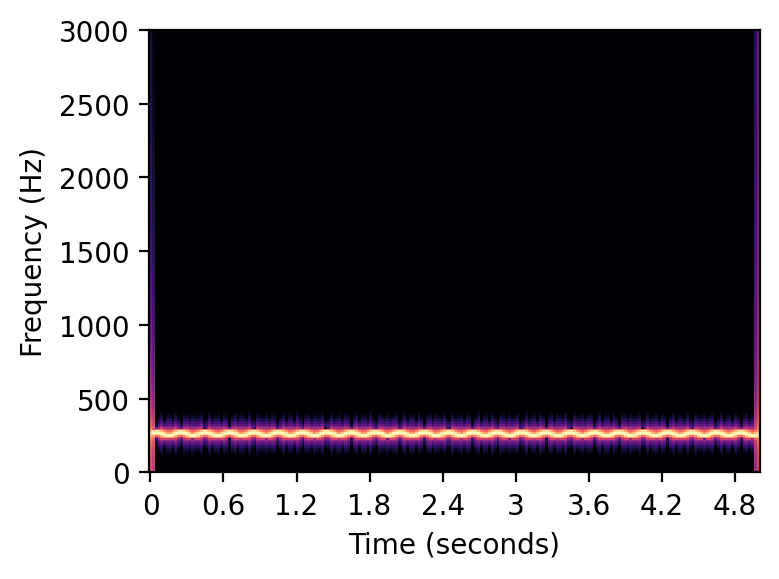

In [30]:
plot_spectrogram(x_vib, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [31]:
ipd.display(ipd.Audio(data=x_vib, rate=Fs))

## バイオリンの波形を生成する

* [Overtone - Wikipedia](https://en.wikipedia.org/wiki/Overtone)

In [32]:
t = np.arange(num_samples) / Fs
x = np.arange(num_samples) / Fs
for i in range(1, 12):
    x_vib, t = generate_sinusoid_vibrato(dur=dur, Fs=Fs, amp=8/(i**(4/3)), freq=freq*i, vib_amp=i*2, vib_rate=5)
    x += x_vib

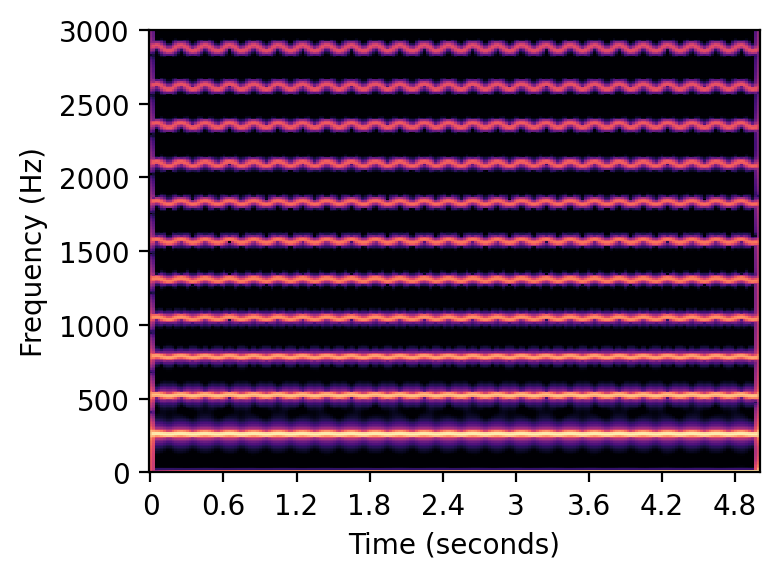

In [33]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [35]:
ipd.display(ipd.Audio(data=x, rate=Fs))

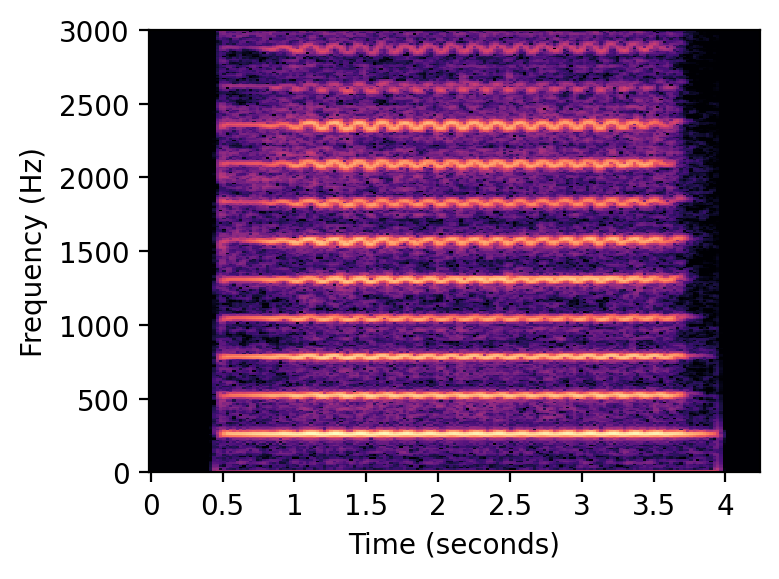

In [36]:
x_violin, Fs = librosa.load('../05/FMP_C1_F23_Violin.wav', sr=Fs)
plot_spectrogram(x_violin, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [37]:
ipd.display(ipd.Audio(data=x_violin, rate=Fs))

# 唸り

* [Beat (acoustics) - Wikipedia](https://en.wikipedia.org/wiki/Beat_(acoustics))

In [1]:
%%ai_ask
次の二つのプログラムの違いについて

```python
def generate_sinusoid_tremolo(dur=5, Fs=1000, amp=0.5, freq=440, trem_amp=0.1, trem_rate=5):
    """Generation of a sinusoid signal with tremolo

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        trem_amp (float): Amplitude of the amplitude oscillation (Default value = 0.1)
        trem_rate (float): Rate (Hz) of the amplitude oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)
    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    amps = amp + trem_amp * np.sin(t * 2 * np.pi * trem_rate)
    x = amps * np.sin(2*np.pi*(freq*t))
    return x, t
```

```python
def generate_sinusoid_vibrato(dur=5, Fs=1000, amp=0.5, freq=440, vib_amp=1, vib_rate=5):
    """Generation of a sinusoid signal with vibrato

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        dur (float): Duration (in seconds) (Default value = 5)
        Fs (scalar): Sampling rate (Default value = 1000)
        amp (float): Amplitude of sinusoid (Default value = 0.5)
        freq (float): Frequency (Hz) of sinusoid (Default value = 440)
        vib_amp (float): Amplitude (Hz) of the frequency oscillation (Default value = 1)
        vib_rate (float): Rate (Hz) of the frequency oscillation (Default value = 5)

    Returns:
        x (np.ndarray): Generated signal
        t (np.ndarray): Time axis (in seconds)

    """
    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    freq_vib = freq + vib_amp * np.sin(t * 2 * np.pi * vib_rate)
    phase_vib = np.zeros(num_samples)
    for i in range(1, num_samples):
        phase_vib[i] = phase_vib[i-1] + 2 * np.pi * freq_vib[i-1] / Fs
    x = amp * np.sin(phase_vib)
    return x, t
```

これらのプログラムは、それぞれトレモロとビブラートを持つ正弦波信号を生成するための関数です。トレモロは振幅の振動を、ビブラートは周波数の振動を持ちます。トレモロの場合、振幅の振動は正弦波で表され、信号の振幅に乗算されます。ビブラートの場合、周波数の振動は位相に加算され、信号の周波数が変化します。

In [2]:
%%ai_continue
「振幅の振動は正弦波で表され、信号の振幅に乗算されます」のところをプログラムの該当箇所を交えて詳しく

トレモロの場合、以下の部分が振幅の振動を表しています。

```python
amps = amp + trem_amp * np.sin(t * 2 * np.pi * trem_rate)
```

ここで、`trem_amp`は振幅の振動の振幅、`trem_rate`は振幅の振動の周波数を表します。`np.sin`関数は、時間軸`t`と振幅の振動の周波数`trem_rate`を用いて正弦波を生成します。この正弦波は、振幅の振動を表しています。

次に、以下の部分で信号の振幅に振幅の振動を乗算しています。

```python
x = amps * np.sin(2*np.pi*(freq*t))
```

ここで、`amps`は振幅の振動を含む信号の振幅を表しています。`np.sin`関数は、周波数`freq`と時間軸`t`を用いて正弦波を生成します。この正弦波は、信号の波形を表しています。最終的に、`amps`と`np.sin`関数の出力を乗算することで、振幅の振動を持つ正弦波信号が生成されます。

In [3]:
%%ai_continue
「周波数の振動は位相に加算され、信号の周波数が変化します」のところをプログラムの該当箇所を交えて詳しく

ビブラートの場合、以下の部分が周波数の振動を表しています。

```python
freq_vib = freq + vib_amp * np.sin(t * 2 * np.pi * vib_rate)
```

ここで、`vib_amp`は周波数の振動の振幅、`vib_rate`は周波数の振動の周波数を表します。`np.sin`関数は、時間軸`t`と周波数の振動の周波数`vib_rate`を用いて正弦波を生成します。この正弦波は、周波数の振動を表しています。

次に、以下の部分で位相を計算しています。

```python
phase_vib = np.zeros(num_samples)
for i in range(1, num_samples):
    phase_vib[i] = phase_vib[i-1] + 2 * np.pi * freq_vib[i-1] / Fs
```

ここで、`phase_vib`は位相を表す配列です。`np.zeros`関数で初期化され、`for`ループで各サンプルの位相が計算されます。`freq_vib`は、前述のように周波数の振動を表す配列であり、各サンプルにおける周波数が変化しているため、位相も変化します。`phase_vib[i-1]`は前のサンプルの位相を表し、`2 * np.pi * freq_vib[i-1] / Fs`は、前のサンプルから現在のサンプルまでの位相の変化を表します。これらを加算することで、現在のサンプルの位相が計算されます。

最終的に、以下の部分で位相を用いて正弦波信号を生成します。

```python
x = amp * np.sin(phase_vib)
```

ここで、`amp`は信号の振幅を表し、`np.sin`関数は、位相`phase_vib`を用いて正弦波を生成します。この正弦波は、周波数の振動を持つ正弦波信号を表しています。

In [4]:
%%ai_continue
正弦波の位相について

正弦波の位相は、波形の形状を決定する重要なパラメーターの1つです。位相は、波形の初期位置を表し、時間とともに変化します。正弦波の式は以下のように表されます。

```
y = A * sin(2πf t + φ)
```

ここで、`A`は振幅、`f`は周波数、`t`は時間、`φ`は位相を表します。位相は、正弦波の初期位置を表し、`2πf t`に加算されます。位相が0の場合、正弦波は時間軸の原点で交差します。位相が正の場合、正弦波は時間軸の原点よりも右側にあります。位相が負の場合、正弦波は時間軸の原点よりも左側にあります。位相は、正弦波の波形を左右反転させることもできます。

In [7]:
%%ai_continue
ビブラートとトレモロと「唸り」の境界について

ビブラート、トレモロ、唸りは、音声信号の周波数変化を表す効果ですが、その境界は曖昧です。一般的には、周波数変化が比較的速い場合はビブラート、遅い場合は唸りと呼ばれます。トレモロは、振幅の変化を表す効果であり、周波数変化を持ちません。ただし、「唸り」という用語は、一般的な音楽用語ではなく、文脈によって異なる意味を持つ場合があります。一部の文脈では、唸りはビブラートと同義語として使用されることがあります。したがって、ビブラート、トレモロ、唸りの境界を明確に定義することは困難です。

* [C1E10_PythagoreanTuning](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1E10_PythagoreanTuning.html)

In [38]:
x1, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=440.0)
x2, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=441.49)

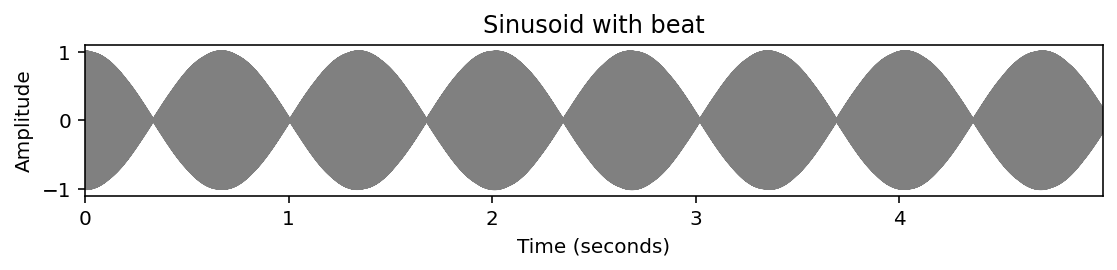

In [40]:
libfmp.b.plot_signal(x1+x2, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with beat')
plt.show()

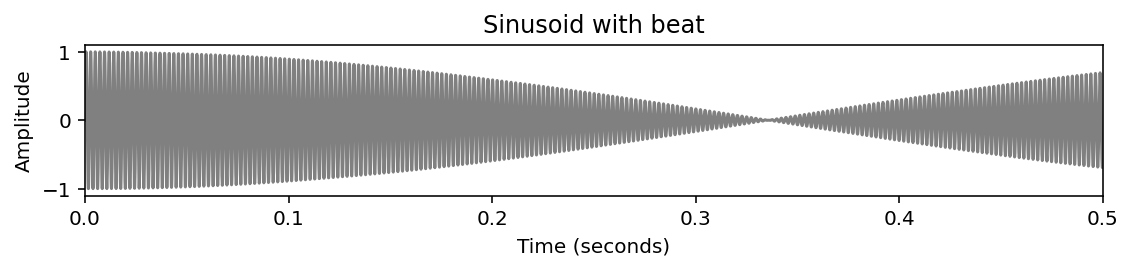

In [45]:
libfmp.b.plot_signal(x1+x2, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid with beat')
plt.xlim(0, .5)
plt.show()